In [5]:
import torch
from torch import nn 
from matplotlib import pyplot as plt
import math as m

In [10]:
def data_split(X  , Y):

    #going with the classic data split 80% - train data , 10% validation data and 10% testing data


    L = len(X)

    split_ratio_train = m.floor(0.8 * L)

    X_train , Y_train = X[:split_ratio_train] , Y[:split_ratio_train]

    split_ratio_validate = split_ratio_train + m.floor(0.1*L)

    X_validate , Y_validate  = X[split_ratio_train : split_ratio_validate]  , Y[split_ratio_train : split_ratio_validate]

    X_test , Y_test = X[split_ratio_validate : ]   , Y[split_ratio_validate : ]


    return (X_train , Y_train) , (X_validate , Y_validate) , (X_test , Y_test)








In [42]:
W = 1.3
b = 0.34

X = torch.rand(100)

Y = W*X + b


In [43]:
data_split(X, Y)

((tensor([7.1946e-03, 3.8962e-02, 9.9289e-01, 9.1311e-01, 6.1858e-01, 9.7439e-01,
          3.1891e-01, 2.1483e-01, 9.2626e-01, 4.7352e-01, 5.9495e-01, 7.9558e-01,
          7.6348e-01, 2.1370e-01, 3.0663e-01, 3.8553e-02, 5.2203e-01, 3.2074e-01,
          6.0738e-01, 5.2326e-01, 9.2627e-01, 5.4306e-01, 7.5057e-01, 6.5778e-01,
          9.4361e-01, 2.9215e-01, 9.1749e-01, 8.5862e-01, 3.0044e-01, 8.0649e-01,
          9.6225e-01, 2.1729e-01, 3.0497e-01, 8.4205e-01, 9.0316e-01, 6.3190e-01,
          6.5354e-01, 8.7033e-01, 9.3819e-01, 1.8377e-01, 2.9433e-01, 9.2098e-01,
          7.7006e-01, 2.6540e-01, 3.3035e-01, 9.8522e-01, 1.8684e-01, 8.2164e-01,
          7.9014e-01, 2.0476e-02, 8.7905e-04, 6.6599e-01, 7.4532e-01, 9.4320e-01,
          5.6163e-01, 8.3921e-01, 1.4466e-01, 7.9846e-01, 1.8326e-02, 8.2572e-01,
          5.5421e-01, 8.0885e-01, 6.9751e-01, 1.5410e-01, 5.0519e-01, 5.6324e-01,
          5.7188e-01, 6.2222e-02, 2.4745e-01, 2.6447e-01, 2.2822e-01, 9.2575e-01,
          7.8283

In [59]:
def plot_predictions(training_data : tuple , testing_data : tuple,
                     predictions = None):
    
    train_data, train_labels = training_data
    test_data , test_labels  = testing_data

    plt.figure(figsize = (10,7))
    plt.scatter(train_data , train_labels , c  = 'b' , s = 4 , label = "training data")
    plt.scatter(test_data , test_labels , c = 'g' , s = 4 , label = "Testing Data")

    if predictions is not None :
        plt.scatter(test_data , predictions , c = 'r' , s = 4 , label = "Predictions")
    else:
        pass

    plt.legend(prop = {"size" : 14})
    plt.show()

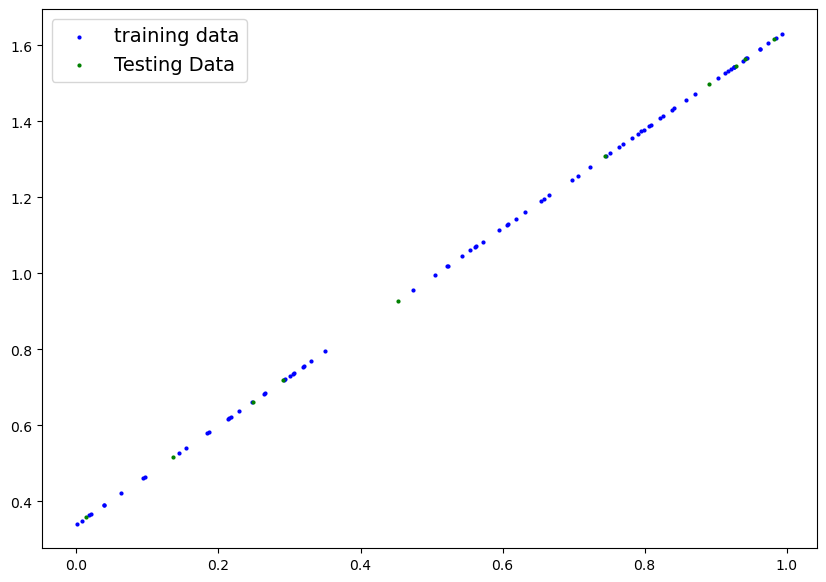

In [44]:
training_data ,_ ,  testing_data = data_split(X, Y)

plot_predictions(training_data , testing_data)


In [48]:
class Linear_Regression_Model(nn.Module):

    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.randn(1 , requires_grad= True, dtype = torch.float))

        self.bias = nn.Parameter(torch.zeros(1,requires_grad= True, dtype = torch.float))

    def forward(self, X : torch.Tensor) -> torch.Tensor:
        return self.weights * X + self.bias


In [49]:
torch.manual_seed(4)

model = Linear_Regression_Model()

model.__dict__['_parameters']
model.state_dict()

OrderedDict([('weights', tensor([-1.6053])), ('bias', tensor([0.]))])

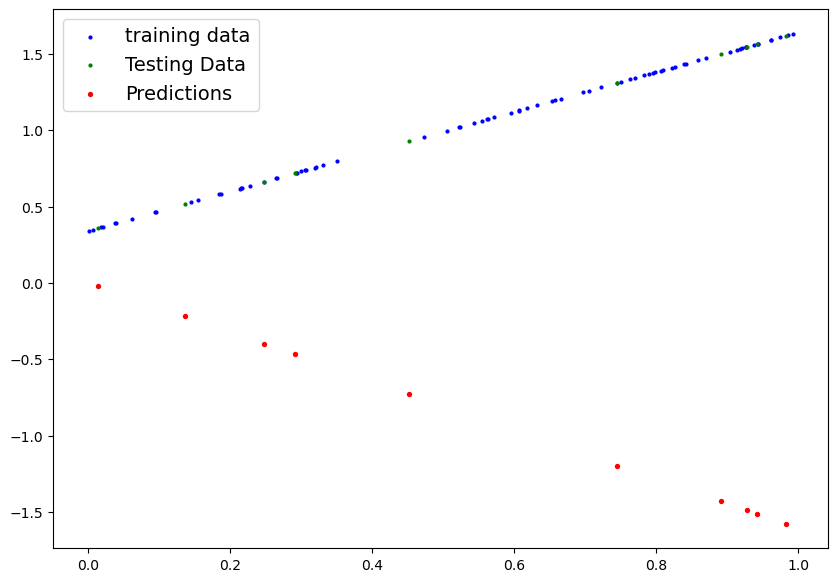

In [50]:
with torch.inference_mode():
    predictions = model.forward(testing_data[0])


plot_predictions(training_data , testing_data , predictions)

In [52]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model.parameters() , lr = 0.01)

In [54]:
epochs = 1000
x_train, y_train = training_data
x_test , y_test = testing_data

for epoch in range(epochs):

    model.train()
    y_pred = model(x_train)
    loss = loss_fn(y_pred , y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()

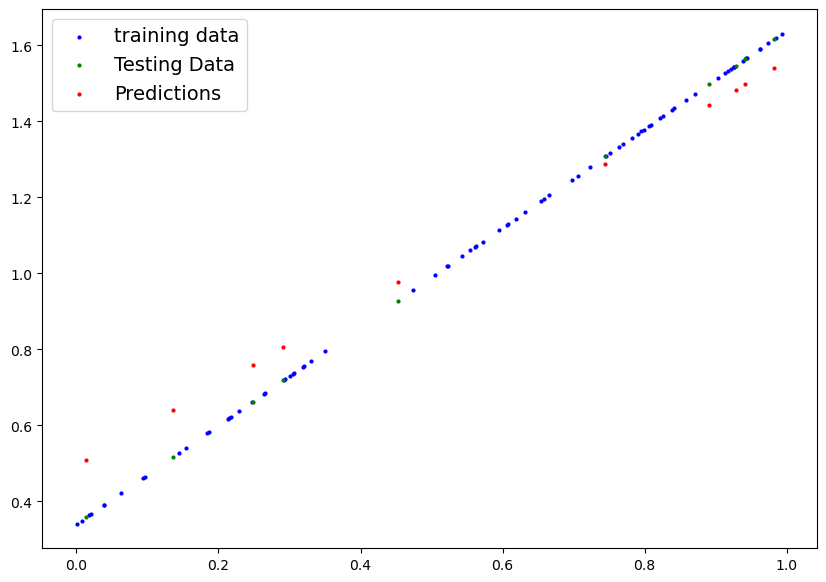

tensor(0.0790)


In [65]:
with torch.inference_mode():

    predictions = model.forward(x_test)
    test_loss = loss_fn(predictions , y_test)
# print(predictions)
# print(y_test)
plot_predictions(training_data, testing_data , predictions)
print(test_loss)

### `Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.`

`matplotlib works on numpy arrays only not tensors`